<a href="https://colab.research.google.com/github/Maks3174/Phy/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання

Провести кластеризації банківських рахунків. [Опис даних](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/data)

* перевірте дані на пропущені значення
* нормалізуйте дані за допомогою:
  1. StandartScaler
  2. MinMaxScaler
* Визначіть оптимальну кількість кластерів за допомогою методу "ліктя". Оберіть метрики:
  1. distortion
  2. silhouette
  3. calinski_harabasz
* Визначіть оптимальну кількість кластерів за силуетних діаграм
* Обрахуйте середні(або медіанні) значення по кожному кластеру та візуалізуйте результат. Дайте опис кластерам
* Проведіть кластеризацію для очищених від викидів даних
* Проведіть кластеризацію за допомогою DBSCAN


In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module7/data/CC%20GENERAL.csv')

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

In [3]:
missing_values = df.isnull().sum()
print("Пропущенні значения:\n", missing_values)

Пропущенные значения:
 CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [4]:
df_cleaned = df.drop(columns=['CUST_ID'])

df_cleaned.fillna(df_cleaned.median(), inplace=True)

scaler_standard = StandardScaler()
df_standard_scaled = scaler_standard.fit_transform(df_cleaned)

scaler_minmax = MinMaxScaler()
df_minmax_scaled = scaler_minmax.fit_transform(df_cleaned)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

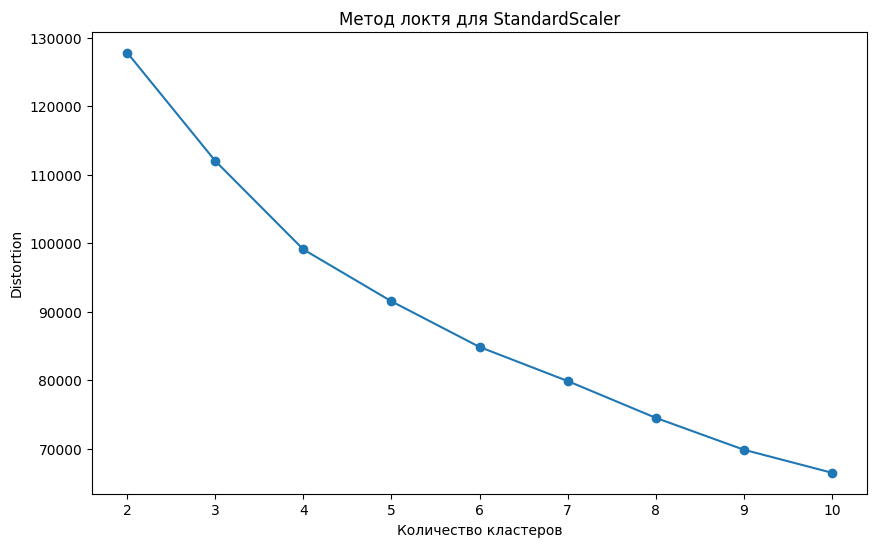

In [5]:
def calculate_metrics(data, max_clusters):
    distortions = []
    silhouette_scores = []
    calinski_harabasz_scores = []

    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)

        distortions.append(kmeans.inertia_)
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(data, labels))
        calinski_harabasz_scores.append(calinski_harabasz_score(data, labels))

    return distortions, silhouette_scores, calinski_harabasz_scores

max_clusters = 10

distortions_standard, silhouette_scores_standard, calinski_harabasz_scores_standard = calculate_metrics(df_standard_scaled, max_clusters)

plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), distortions_standard, marker='o')
plt.title('Метод локтя для StandardScaler')
plt.xlabel('Количество кластеров')
plt.ylabel('Distortion')
plt.show()

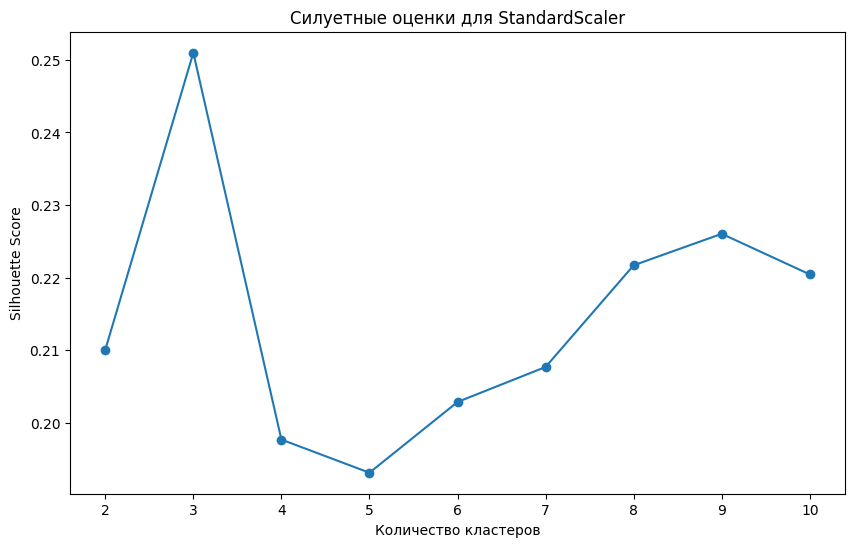

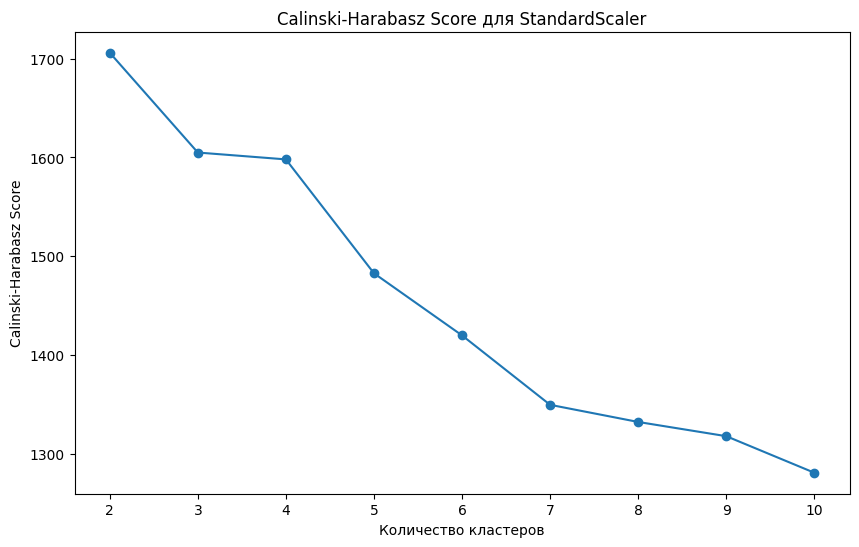

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), silhouette_scores_standard, marker='o')
plt.title('Силуетные оценки для StandardScaler')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), calinski_harabasz_scores_standard, marker='o')
plt.title('Calinski-Harabasz Score для StandardScaler')
plt.xlabel('Количество кластеров')
plt.ylabel('Calinski-Harabasz Score')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        1012.658327           0.789924   270.041785        209.937299   
1        3551.153761           0.986879  7681.620098       5095.878826   
2        4602.449658           0.968389   501.862982        320.188797   
3         894.907458           0.934734  1236.178934        593.974874   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                     60.371441    596.509903             0.170145   
1                   2587.208264    653.638891             0.946418   
2                    181.759123   4521.509581             0.287832   
3                    642.478274    210.570626             0.885165   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                      

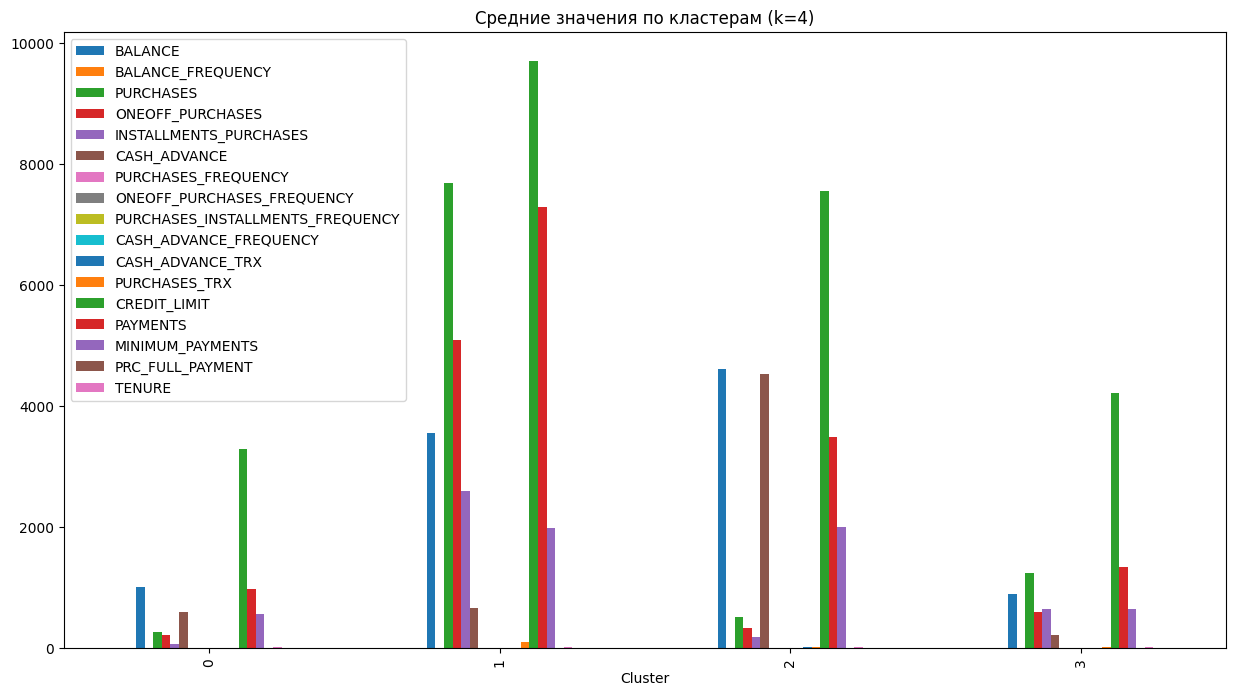

In [7]:
optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(df_standard_scaled)

cluster_means = df_cleaned.groupby('Cluster').mean()

print(cluster_means)

cluster_means.plot(kind='bar', figsize=(15, 8))
plt.title(f'Средние значения по кластерам (k={optimal_clusters})')
plt.show()

In [8]:
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    data_outliers_removed = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
    return data_outliers_removed

df_outliers_removed = remove_outliers(df_cleaned.drop(columns=['Cluster']))

df_outliers_removed_scaled = scaler_standard.fit_transform(df_outliers_removed)

kmeans_outliers_removed = KMeans(n_clusters=optimal_clusters, random_state=42)
df_outliers_removed['Cluster'] = kmeans_outliers_removed.fit_predict(df_outliers_removed_scaled)

cluster_means_outliers_removed = df_outliers_removed.groupby('Cluster').mean()

print(cluster_means_outliers_removed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        1378.257029           0.981858  1128.110000        831.976535   
1        1988.013975           0.987835    97.852273         61.541223   
2         956.417993           0.974930   153.785615        114.159385   
3         714.563621           0.974935   507.872771         66.545816   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    296.339452    237.468832             0.658443   
1                     36.311050   1209.274031             0.104676   
2                     39.901953    183.078408             0.158605   
3                    441.813018    130.854461             0.853452   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                      

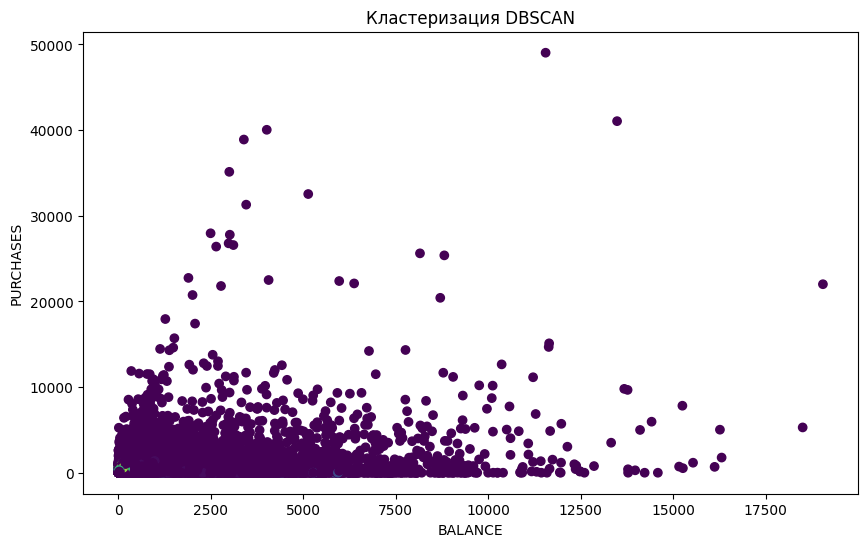

In [9]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_cleaned['Cluster_DBSCAN'] = dbscan.fit_predict(df_standard_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['BALANCE'], df_cleaned['PURCHASES'], c=df_cleaned['Cluster_DBSCAN'], cmap='viridis')
plt.title('Кластеризация DBSCAN')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.show()